In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

import jcamp
from getNistData import getNIST
from Fluids_ID import Fluids_ID

In [2]:
data = getNIST(fluid_id = Fluids_ID['hydrogen'], Temp = 30, Plow = 100, Phigh= 200, deltaP = 10, TypeOfData ='IsoTherm')

In [3]:
data

,Temperature (C),Pressure (psia),Density (g/ml),Volume (ml/g),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (F/psia),Viscosity (cP),Therm. Cond. (W/m*K),Phase
0,30.0,100.0,0.000549,1820.70,5.5450,8.0756,92.125,20.566,28.906,1331.0,-0.003861,0.009031,0.18777,vapor
1,30.0,110.0,0.000604,1655.80,5.5446,8.0762,91.331,20.567,28.910,1331.6,-0.003865,0.009033,0.18783,vapor
2,30.0,120.0,0.000659,1518.40,5.5442,8.0768,90.606,20.568,28.913,1332.1,-0.003869,0.009034,0.18788,vapor
3,30.0,130.0,0.000713,1402.20,5.5438,8.0775,89.939,20.569,28.917,1332.7,-0.003873,0.009036,0.18794,vapor
4,30.0,140.0,0.000768,1302.60,5.5434,8.0781,89.322,20.570,28.921,1333.3,-0.003877,0.009038,0.18799,vapor
5,30.0,150.0,0.000822,1216.20,5.5430,8.0787,88.747,20.571,28.924,1333.9,-0.003881,0.009039,0.18804,vapor
6,30.0,160.0,0.000877,1140.70,5.5426,8.0793,88.209,20.572,28.928,1334.5,-0.003884,0.009041,0.18810,vapor
7,30.0,170.0,0.000931,1074.00,5.5422,8.0800,87.704,20.574,28.932,1335.0,-0.003888,0.009043,0.18815,vapor
8,30.0,180.0,0.000985,1014.70,5.5418,8.0806,87.227,20.575,28.935,1335.6,-0.003892,0.009044,0.18821,vapor
9,30.0,190.0,0.001040,961.70,5.5415,8.0812,86.776,20.576,28.939,1336.2,-0.003896,0.009046,0.18826,vapor


In [4]:
data2 = jcamp.JCAMP_reader('7732-18-5-IR.jdx')
data2

{'title': 'WATER',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ III',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY',
 'date': '1969/10/21',
 'cas registry no': '7732-18-5',
 'molform': 'H2 O',
 'source reference': 'COBLENTZ NO. 10116',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob10116',
 'spectrometer/data system': 'DOW KBr FOREPRISM-GRATING',
 'instrument parameters': 'BLAZED AT 3.5, 12.0, 20.0 MICRON, CHANGED AT 5.0, 7.5, 14.9 MICRON',
 'state': 'LIQUID (NEAT)',
 'path length': 'CAPILLARY, AgCl PLATES',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'TRANSMITTANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.870985,
 'firstx': 388.677,
 'lastx': 3799.46,
 'firsty': 0.438,
 'maxx': 3799.46,
 'minx': 388.677,
 'maxy': 0.987,
 'miny': 0.001,
 'npoints': 3917,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': array([ 388.677  

In [5]:
y_abs = 1 - data2['y']
data2['yunits'] = 'ABSORBANCE'
data2['y'] = y_abs
data2

{'title': 'WATER',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ III',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY',
 'date': '1969/10/21',
 'cas registry no': '7732-18-5',
 'molform': 'H2 O',
 'source reference': 'COBLENTZ NO. 10116',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob10116',
 'spectrometer/data system': 'DOW KBr FOREPRISM-GRATING',
 'instrument parameters': 'BLAZED AT 3.5, 12.0, 20.0 MICRON, CHANGED AT 5.0, 7.5, 14.9 MICRON',
 'state': 'LIQUID (NEAT)',
 'path length': 'CAPILLARY, AgCl PLATES',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'ABSORBANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.870985,
 'firstx': 388.677,
 'lastx': 3799.46,
 'firsty': 0.438,
 'maxx': 3799.46,
 'minx': 388.677,
 'maxy': 0.987,
 'miny': 0.001,
 'npoints': 3917,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': array([ 388.677     

Text(0.5, 1.0, 'H$_{2}$O')

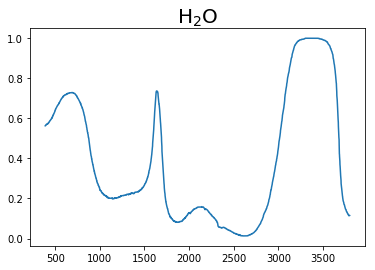

In [6]:
plt.plot(data2['x'], data2['y'])
plt.title('H$_{2}$O', fontsize=20)

In [7]:
data3 = jcamp.JCAMP_reader('74-82-8-IR.jdx')

In [8]:
y_abs = 1 - data3['y']
data3['yunits'] = 'ABSORBANCE'
data3['y'] = y_abs

Text(0.5, 1.0, 'methane')

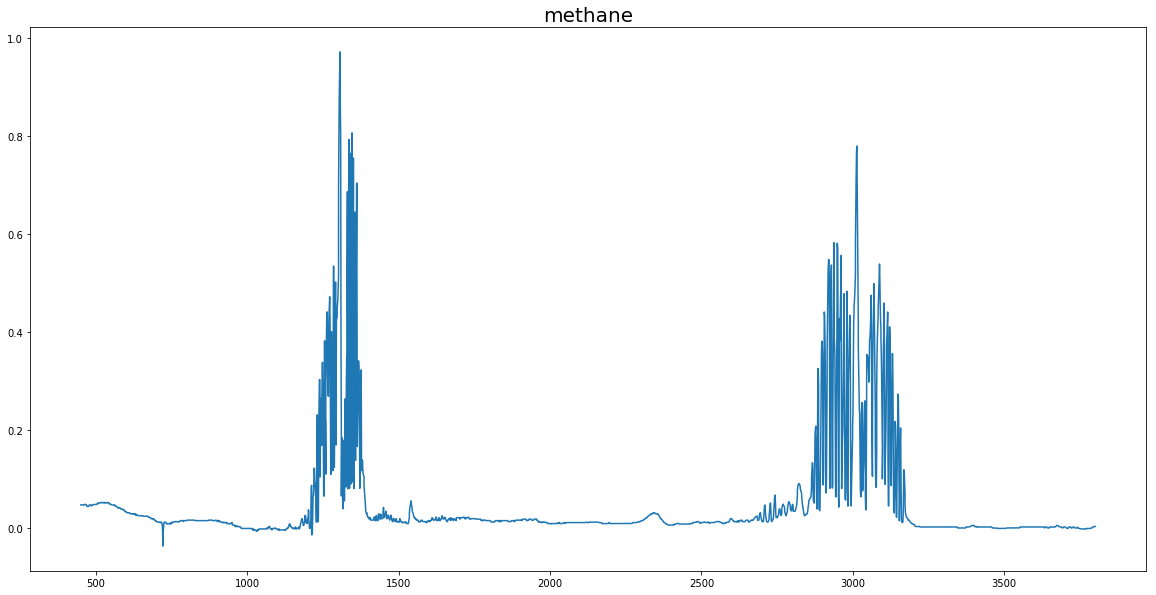

In [9]:
plt.figure(figsize=(20,10))
plt.plot(data3['x'], data3['y'])
plt.title('methane', fontsize=20)

In [10]:
data4 = jcamp.JCAMP_reader('124-38-9-IR.jdx')

In [11]:
y_abs = 1 - data4['y']
data4['yunits'] = 'ABSORBANCE'
data4['y'] = y_abs
data4

{'title': 'CARBON DIOXIDE',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY',
 'date': 1964,
 'names': 'dioxomethane',
 'cas registry no': '124-38-9',
 'molform': 'C O2',
 'source reference': 'COBLENTZ NO. 8753',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob8753',
 'spectrometer/data system': 'DOW KBr FOREPRISM',
 'instrument parameters': 'GRATING CHANGED AT 5.0, 7.5, 15.0 MICRON',
 'state': 'GAS (200 mmHg DILUTED TO A TOTAL PRESSURE OF 600 mmHg WITH N2)',
 'path length': '10 CM',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'ABSORBANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.934582,
 'firstx': 458.879,
 'lastx': 3797.21,
 'firsty': 0.973,
 'maxx': 3797.21,
 'minx': 458.879,
 'maxy': 1.023,
 'miny': 0.018,
 'npoints': 3573,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': ar

3573


Text(0.5, 1.0, 'C02')

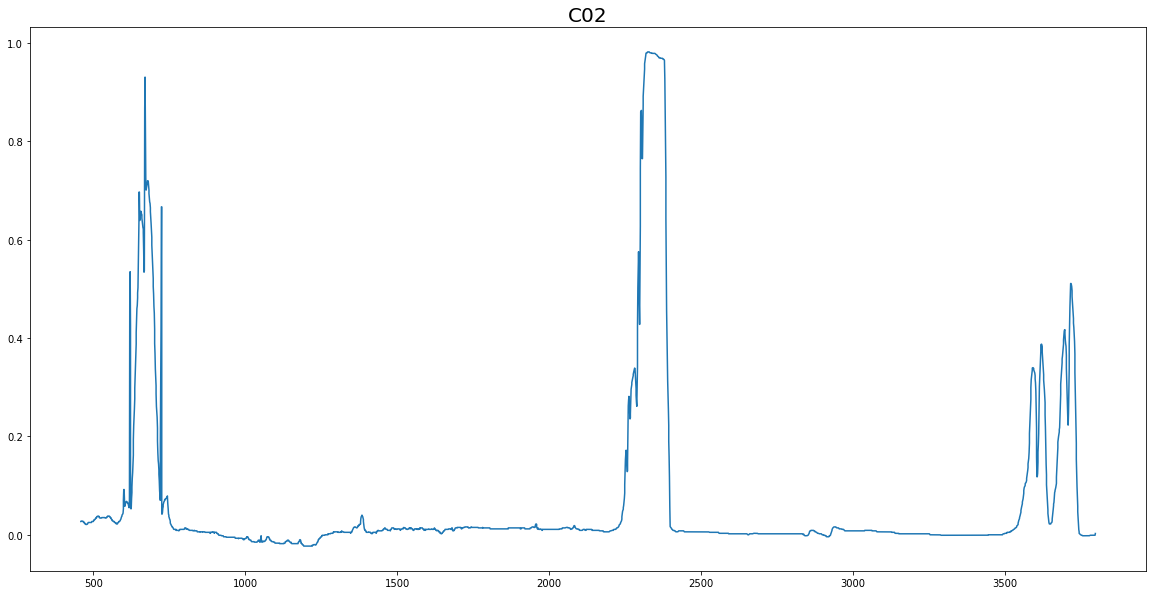

In [12]:
plt.figure(figsize=(20,10))
print(data4['y'].size)
a=data4['x'].size
plt.plot(data4['x'], data4['y'][0:a])
plt.title('C02', fontsize=20)

In [13]:
# Importing the functions
import numpy
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
%matplotlib inline


[102 110 119 128 142 149 171 178 183 191 197 202 207 212 217 230 239 243]
[1247.195035   1254.213144   1263.570622   1271.75841625 1284.6249485
 1291.643058   1311.527699   1318.54580825 1323.22454725 1330.24265575
 1336.09108    1340.7698195  1345.4485585  1350.1272975  1354.8060365
 1366.502885   1375.860363   1379.369418  ] [0.338  0.382  0.441  0.472  0.5347 0.502  0.1849 0.179  0.264  0.6864
 0.793  0.765  0.8067 0.7552 0.6449 0.341  0.3228 0.139 ]


Text(0.5, 1.0, 'First estimate')

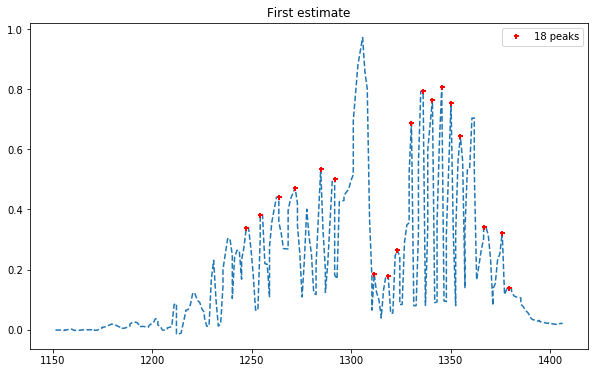

In [14]:
#Getting a first estimate of the peaks
#By using peakutils.indexes, we can get the indexes of the peaks from the data. Due to the noise, it will be just a rough
#approximation
x=data3['x'][750:a-2550]
y= data3['y'][750:a-2550]
indexes = peakutils.indexes(y, thres=0.115, min_dist=2)
print(indexes)
print(x[indexes], y[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, y, indexes)
pyplot.title('First estimate')

In [15]:
# Enhancing the resolution by interpolation
# We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
#peaks_x = peakutils.interpolate(x, y, ind=indexes)
#print(peaks_x)

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-15-b0e0e087144a> in <module>
      1 # Enhancing the resolution by interpolation
      2 # We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
----> 3 peaks_x = peakutils.interpolate(x, y, ind=indexes)
      4 print(peaks_x)

~\Anaconda3\lib\site-packages\PeakUtils-1.0.3-py3.6.egg\peakutils\peak.py in interpolate(x, y, ind, width, func)
    179     out = []
    180     for slice_ in (slice(i - width, i + width) for i in ind):
--> 181         fit = func(x[slice_], y[slice_])
    182         out.append(fit)
    183 

~\Anaconda3\lib\site-packages\PeakUtils-1.0.3-py3.6.egg\peakutils\peak.py in gaussian_fit(x, y, center_only)
    141     '''
    142     initial = [np.max(y), x[0], (x[1] - x[0]) * 5]
--> 143     params, pcov = optimize.curve_fit(gaussian, x, y, initial)
    144 
    145     if center_only:

~\Anaconda3\lib\site-packages\scipy\optimize\minpack.py in curve_fit(f, xdata, ydata, p0, sigma, absolute_sigma, check_finite, bounds, method, jac, **kwargs)
    746         cost = np.sum(infodict['fvec'] ** 2)
    747         if ier not in [1, 2, 3, 4]:
--> 748             raise RuntimeError("Optimal parameters not found: " + errmsg)
    749     else:
    750         # Rename maxfev (leastsq) to max_nfev (least_squares), if specified.

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Text(0.5, 1.0, 'Data with baseline')

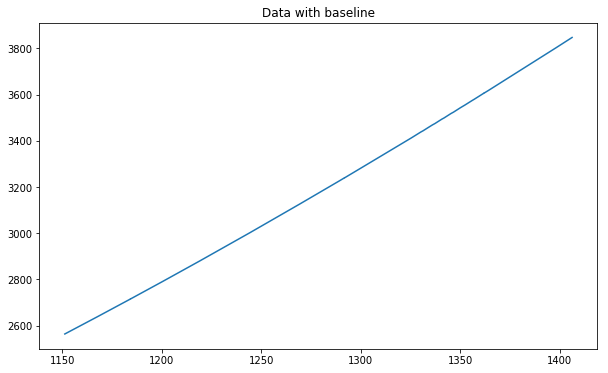

In [16]:
#
y2 = y + numpy.polyval([0.002,-0.08,5], x)
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y2)
pyplot.title("Data with baseline")

Text(0.5, 1.0, 'Data with baseline removed')

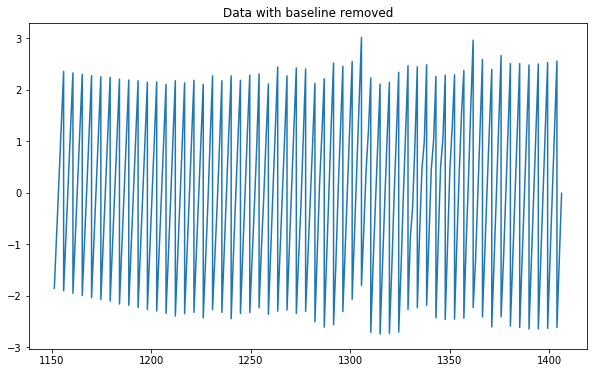

In [17]:
#Data with baseline removed
base = peakutils.baseline(y2, 2)
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y2-base)
pyplot.title("Data with baseline removed")

Text(0.5, 1.0, 'Data with noise')

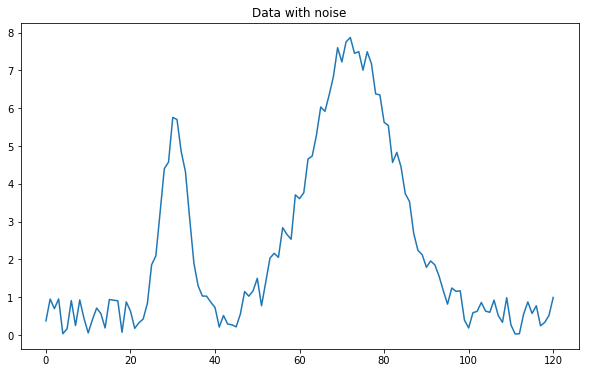

In [18]:
# Lets generate some noisy data from two Gaussians:
centers = (30.5, 72.3)
x = numpy.linspace(0, 120, 121)
y = (peakutils.gaussian(x, 5, centers[0], 3) +
peakutils.gaussian(x, 7, centers[1], 10) +
numpy.random.rand(x.size))
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y)
pyplot.title("Data with noise")

[30 72]
[30. 72.] [5.75739221 7.87160488]


Text(0.5, 1.0, 'First estimate')

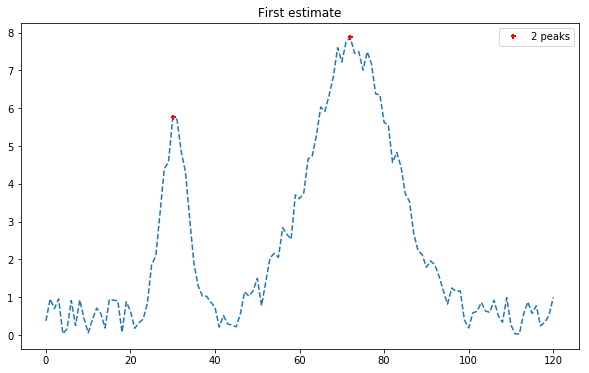

In [19]:
#Getting a first estimate of the peaks
#By using peakutils.indexes, we can get the indexes of the peaks from the data. Due to the noise, it will be just a rough
#approximation
indexes = peakutils.indexes(y, thres=0.5, min_dist=30)
print(indexes)
print(x[indexes], y[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, y, indexes)
pyplot.title('First estimate')

In [20]:
# Enhancing the resolution by interpolation
# We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
peaks_x = peakutils.interpolate(x, y, ind=indexes)
print(peaks_x)


[30.46681491 72.55365336]


Text(0.5, 1.0, 'Data with baseline')

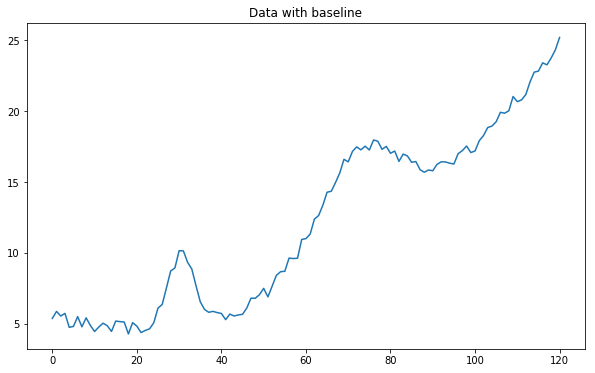

In [21]:
#Data with baseline
y2 = y + numpy.polyval([0.002,-0.08,5], x)
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y2)
pyplot.title("Data with baseline")

Text(0.5, 1.0, 'Data with baseline removed')

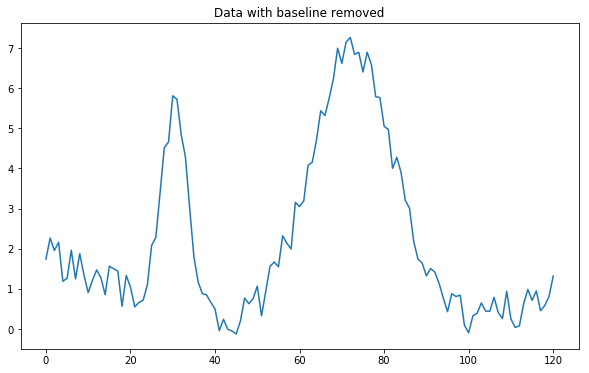

In [22]:
#Data with baseline removed
base = peakutils.baseline(y2, 2)
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y2-base)
pyplot.title("Data with baseline removed")